In [9]:
import sys
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl

In [10]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [11]:
kwf2.describe()

,Unnamed: 0,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
count,288864.000000,282021.000000,195344.000000,195344.000000,195344.000000,288864.000000,209930.000000,194682.000000,192779.000000,194682.000000,...,208211.000000,72155.000000,72155.000000,72155.000000,72155.000000,74328.000000,74328.000000,74328.000000,72155.000000,72155.000000
mean,25084.213858,6.457120,0.889793,4.768730,8.195637,6.134347,6.638716,0.809916,5.185919,8.233034,...,28.450763,13.098174,112.810878,8.831761,62.138586,7.888235,7.854466,0.005063,26.284200,14.121179
std,15131.450298,2.819366,0.460713,2.324638,3.583963,0.673818,2.875127,0.418033,2.372978,3.517372,...,18.324022,9.731656,69.437974,6.811915,44.658993,4.901937,4.948065,0.036076,16.082159,10.237020
min,0.000000,0.000000,0.000000,0.000000,0.098438,5.200000,0.000000,0.000000,0.000000,0.000000,...,2.515251,1.058571,3.317408,0.628583,5.078897,0.390000,0.080000,0.000000,0.000000,0.000000
25%,12035.750000,4.469000,0.556589,3.098515,5.686128,5.700000,4.652990,0.502698,3.538838,5.785436,...,16.127810,6.312737,65.359371,4.245896,32.983454,3.921895,3.921353,0.000000,15.134419,7.416047
50%,24071.500000,6.229415,0.803866,4.680782,7.742758,5.700000,6.405562,0.742592,5.091677,7.816731,...,24.996609,10.932002,106.381348,7.093553,53.588329,6.067192,6.067192,0.000000,25.077280,12.187503
75%,38116.000000,8.162886,1.127582,6.248571,10.284431,6.900000,8.397436,1.036836,6.653441,10.354494,...,36.721218,17.415776,152.037766,11.582320,79.893345,11.051497,11.051497,0.000000,35.620654,18.220162
max,52703.000000,26.389881,5.740880,21.167084,32.346001,7.100000,26.557840,4.986292,20.509050,34.319450,...,283.514594,137.506042,756.648132,84.116875,704.148071,36.793720,36.793720,0.603307,201.509970,194.406137


In [12]:
kwf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288864 entries, 0 to 288863
Columns: 300 entries, Unnamed: 0 to Tower Acceleration Y, StdDev (mm/ss)
dtypes: float64(295), int64(4), object(1)
memory usage: 661.2+ MB


In [13]:
kwf2.columns.values

array(['Unnamed: 0', '# Date and time', 'Wind speed (m/s)',
       'Wind speed, Standard deviation (m/s)',
       'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)',
       'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)',
       'Wind speed Sensor 1, Standard deviation (m/s)',
       'Wind speed Sensor 1, Minimum (m/s)',
       'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)',
       'Wind speed Sensor 2, Standard deviation (m/s)',
       'Wind speed Sensor 2, Minimum (m/s)',
       'Wind speed Sensor 2, Maximum (m/s)',
       'Density adjusted wind speed (m/s)', 'Wind direction (°)',
       'Nacelle position (°)', 'Wind direction, Standard deviation (°)',
       'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)',
       'Nacelle position, Standard deviation (°)',
       'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)',
       'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)',
       'Vane position 1+2, Min (°)', 'Vane position 1

# Correlations

In [14]:
# 10min time steps, 1 hour = 6 * 10min, 1 day = 24 * 6 *10min
kwf2["power_next_step"] = kwf2["Power (kW)"].shift(-1)
kwf2["power_next_hour"] = kwf2["Power (kW)"].shift(-6)
kwf2["power_next_day"] = kwf2["Power (kW)"].shift(-144)
#kwf2.drop(columns=["Power (kW)"])

corr_matrix = kwf2.corr()

corr_matrix[["power_next_step","power_next_hour","power_next_day"]]

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_8773/431666286.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = kwf2.corr()


,power_next_step,power_next_hour,power_next_day
Unnamed: 0,-0.038709,-0.038699,-0.038215
Wind speed (m/s),0.902893,0.848652,0.357681
"Wind speed, Standard deviation (m/s)",0.691575,0.666519,0.275709
"Wind speed, Minimum (m/s)",0.869992,0.816534,0.352998
"Wind speed, Maximum (m/s)",0.904175,0.857145,0.363228
...,...,...,...
"Tower Acceleration X, StdDev (mm/ss)",0.580130,0.567669,0.257753
"Tower Acceleration Y, StdDev (mm/ss)",0.728734,0.703464,0.338417
power_next_step,1.000000,0.911698,0.365460
power_next_hour,0.911698,1.000000,0.374265


# Plot data

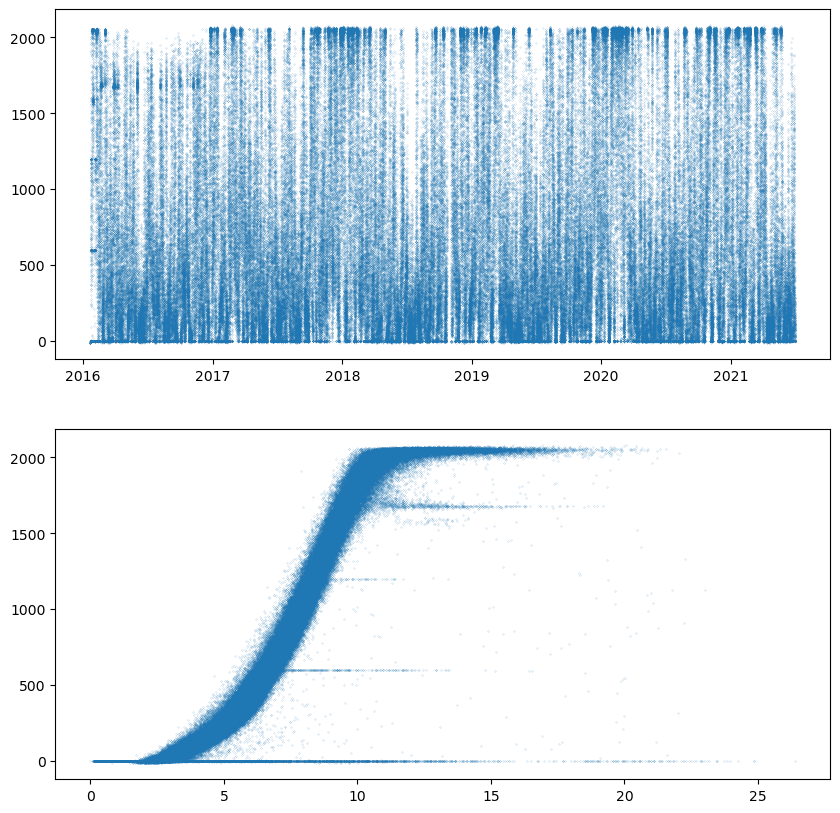

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

kwf2 = kwf2.rename(columns={'# Date and time':'time',
                            'Wind speed (m/s)':'wind_speed',
                            'Power (kW)':'power'})

kwf2 = kwf2.set_index(["time"])
kwf2.index = pd.to_datetime(kwf2.index)

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].scatter(kwf2.index,kwf2['power'], s=0.01)
ax[1].scatter(kwf2['wind_speed'],kwf2['power'], s=0.01)